In [ ]:
import networkx as nx
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import time,random
import matplotlib.colors as mcolors

In [ ]:
def eigen(G):
    # Handle empty or single-node graphs
    if G.number_of_edges() == 0 or G.number_of_nodes() == 0:
        return [],[]

    # Adjacency matrix (nodes sorted for consistency)
    adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))

    # Degree vector
    k = np.array([deg for _, deg in G.degree()])
    m = G.number_of_edges()

    # Modularity matrix
    B = adj_matrix - np.outer(k, k) / (2 * m)

    # Eigen-decomposition
    eigenval, eigenvec = np.linalg.eigh(B)

    # Sort in descending order
    idx = np.argsort(eigenval)[::-1]
    eigenval = eigenval[idx]
    eigenvec = eigenvec[:, idx]

    # Ensure consistent sign for leading eigenvector
    if np.sum(eigenvec[:, 0]) < 0:
        eigenvec[:, 0] = -eigenvec[:, 0]

    # Return leading eigenvalue and corresponding eigenvector
    return eigenval[0], eigenvec[:, 0]


In [ ]:
def graph_draw(used_color):
  pos = nx.spring_layout(Graph, seed=42, k=0.3)    #type: ignore                # k controls spacing
  plt.figure(figsize=(10, 8))
  nx.draw(
      Graph, pos,                                  #type: ignore
      with_labels=True,
      node_size=300,
      font_size=8,
      node_color=used_color,
      edge_color='gray'
  )
  plt.show()



In [ ]:
def update_color(G):
  L1=list(G.nodes)
  L2=list(Graph.nodes).                      #type: ignore

  c=random.sample(remaining_colors,k=1)[0]                                      # Extract the color string from the list
  remaining_colors.remove(c)                 #type: ignore
  for i in L2:
    if i in L1:
      used_color[L2.index(i)]=c              #type: ignore

In [ ]:
def graph_sub(G, num):
  eigenval, eigenvec = eigen(G)
  if eigenval is None:
      return nx.Graph()                                                         # Empty
  if type(eigenval) is not list:
    if eigenval<0:
      return G

  nodes = sorted(G.nodes())                                                     # The same order used in eigen(G)
  Node_sub = []

  for i, val in enumerate(eigenvec):
      if num == 0 and val > 0:
          Node_sub.append(nodes[i])
      elif num == 1 and val <= 0:
          Node_sub.append(nodes[i])
  return G.subgraph(Node_sub)


In [ ]:
def master(G,j,k,i=1):

  global D_deg_centrality_sub                                                   # Declare D_deg_centrality_sub as global
  global D_btw_centrality_sub
  global D_clo_centrality_sub
  global D_clus_coef_sub

  his.append(graph_sub(G,0)).              #type: ignore
  D_deg_centrality_sub[i]=nx.degree_centrality(graph_sub(G,0))
  D_btw_centrality_sub[i]=nx.betweenness_centrality(graph_sub(G,0))
  D_clo_centrality_sub[i]=nx.closeness_centrality(graph_sub(G,0))
  D_clus_coef_sub[i]=nx.clustering(graph_sub(G,0))

  his.append(graph_sub(G,1))               #type: ignore
  D_deg_centrality_sub[i+1]=nx.degree_centrality(graph_sub(G,1))
  D_btw_centrality_sub[i+1]=nx.betweenness_centrality(graph_sub(G,1))
  D_clo_centrality_sub[i+1]=nx.closeness_centrality(graph_sub(G,1))
  D_clus_coef_sub[i+1]=nx.clustering(graph_sub(G,1))

  update_color(graph_sub(G,0))
  update_color(graph_sub(G,1))

  if round(np.log2(k+1)) >= 1 and abs(np.log2(k+1) - round(np.log2(k+1))) < 1e-9:   #Only draws a graph for k=[1,3,7,.....]

     D_deg_centrality[round(np.log2(k+1))]=D_deg_centrality_sub                 #type: ignore
     D_deg_centrality_sub={}

     D_btw_centrality[round(np.log2(k+1))]=D_btw_centrality_sub                 #type: ignore
     D_btw_centrality_sub={}

     D_clo_centrality[round(np.log2(k+1))]=D_clo_centrality_sub                 #type: ignore
     D_clo_centrality_sub={}

     D_clus_coef[round(np.log2(k+1))]=D_clus_coef_sub                           #type: ignore
     D_clus_coef_sub={}
     print()
     print(f"Iteration : {round(np.log2(k+1))}")
     print()
     graph_draw(used_color)                                                     #type: ignore
     i=-2

  j+=1
  k+=1
  i+=2

  if not G.nodes:                                                               # Stop recursion if the graph is empty
      return

  master(his[j],j,k,i)                                                          #type: ignore

In [ ]:
def karate_club_graph():
  Graph=nx.karate_club_graph()

  pos = nx.spring_layout(Graph, seed=42, k=0.3)                                   # k controls spacing
  plt.figure(figsize=(10, 8))
  nx.draw(
      Graph, pos,
      with_labels=True,
      node_size=300,
      font_size=8,
      node_color='lightblue',
      edge_color='gray'
  )
  plt.show()

  return Graph

In [ ]:
def Custom_Graph():
  global E
  E=[]
  Edge_Set(chk=1).                                                              #type: ignore
  Graph=nx.Graph()
  Graph.add_edges_from(E)

  pos = nx.spring_layout(Graph, seed=42, k=0.3)                                   # k controls spacing
  plt.figure(figsize=(10, 8))
  nx.draw(
      Graph, pos,
      with_labels=True,
      node_size=300,
      font_size=8,
      node_color='lightblue',
      edge_color='gray'
  )
  plt.show()


  return Graph

In [ ]:
def Edge_Set(chk):
  if chk==1:
    e=eval(input("Enter vertices A and B between which an edge exists (All Vertices must be Natrual Numbers): "))
    E.append(e)
  else:
    return
  chk=int(input("Enter 1 to add more edges and 0 to exit : "))
  Edge_Set(chk)

In [ ]:
def initialization(Graph):

  global his
  his=[]

  global D_deg_centrality_sub
  D_deg_centrality_sub={}

  global D_deg_centrality
  D_deg_centrality={}

  D_deg_centrality[0]={0:nx.degree_centrality(Graph)}


  global D_btw_centrality_sub
  D_btw_centrality_sub={}

  global D_btw_centrality
  D_btw_centrality={}

  D_btw_centrality[0]={0:nx.betweenness_centrality(Graph)}


  global D_clo_centrality_sub
  D_clo_centrality_sub={}

  global D_clo_centrality
  D_clo_centrality={}

  D_clo_centrality[0]={0:nx.closeness_centrality(Graph)}


  global D_clus_coef_sub
  D_clus_coef_sub={}

  global D_clus_coef
  D_clus_coef={}

  D_clus_coef[0]={0:nx.clustering(Graph)}

  his.append(Graph)


In [ ]:
def menu_drive_graph():

  print("Recursive Spectral Modularity Program")

  print()
  print("Select graph of interest : ")
  print("1. Karate Club Graph")
  print("2. Custom Graph")
  print("3. Exit")

  print()
  a=int(input("Enter your choice : "))

  return a


In [ ]:
def menu_drive_method():

  print("Select method of interest : ")

  print()
  print("1. Central Degree of Cardinality")
  print("2. Betweenness Centrality")
  print("3. Closeness Centrality")
  print("4. Coefficient of Clustering")
  print("5. Exit")

  print()
  a=int(input("Enter your choice : "))

  print()
  if a!=5:
    node=int(input("Enter Node of Interest : "))

  print()
  if a==1:
    deg_centrality(D_deg_centrality,node)                                       #type: ignore

  elif a==2:
    betweenness_centrality(D_btw_centrality,node)                               #type: ignore

  elif a==3:
    closeness_centrality(D_clo_centrality,node)                                 #type: ignore

  elif a==4:
    coefficient_clustering(D_clus_coef,node)                                    #type: ignore

  else:
    print("Exiting Program...")
    return

  print()



In [ ]:
def deg_centrality(D_deg_centrality,node):

  x = [i for i in D_deg_centrality.keys()]
  y = []

  D=list(D_deg_centrality.values())
  for i in D:
    for d_value in i.values():
      for key,value in d_value.items():
        if key==node:
          y.append(value)

  # Plot
  plt.plot(x, y, marker='o', linestyle='-', color='b', label='')

  # Labels and title
  plt.xlabel('Iteration')
  plt.ylabel('Degree Centrality')
  plt.title(f'Degree Centrality evolution for Node {node}')


  # Display
  plt.show()


In [ ]:
def betweenness_centrality(D_btw_centrality,node):

  x = [i for i in D_btw_centrality.keys()]
  y = []

  D=list(D_btw_centrality.values())
  for i in D:
    for d_value in i.values():
      for key,value in d_value.items():
        if key==node:
          y.append(value)

  # Plot
  plt.plot(x, y, marker='o', linestyle='-', color='b', label='')

  # Labels and title
  plt.xlabel('Iteration')
  plt.ylabel('Betweenness Centrality')
  plt.title(f'Betweenness Centrality evolution for Node {node}')


  # Display
  plt.show()


In [ ]:
def closeness_centrality(D_clo_centrality,node):

  x = [i for i in D_clo_centrality.keys()]
  y = []

  D=list(D_clo_centrality.values())
  for i in D:
    for d_value in i.values():
      for key,value in d_value.items():
        if key==node:
          y.append(value)

  # Plot
  plt.plot(x, y, marker='o', linestyle='-', color='b', label='')

  # Labels and title
  plt.xlabel('Iteration')
  plt.ylabel('Closeness Centrality')
  plt.title(f'Closeness Centrality evolution for Node {node}')


  # Display
  plt.show()


In [ ]:
def coefficient_clustering(D_clus_coef,node):

  x = [i for i in D_clus_coef.keys()]
  y = []

  D=list(D_clus_coef.values())
  for i in D:
    for d_value in i.values():
      for key,value in d_value.items():
        if key==node:
          y.append(value)

  # Plot
  plt.plot(x, y, marker='o', linestyle='-', color='b', label='')

  # Labels and title
  plt.xlabel('Iteration')
  plt.ylabel('Clustering Coefficient')
  plt.title(f'Clustering Coefficient evolution for Node {node}')


  # Display
  plt.show()


Recursive Spectral Modularity Program

Select graph of interest : 
1. Karate Club Graph
2. Custom Graph
3. Exit

Enter your choice : 1


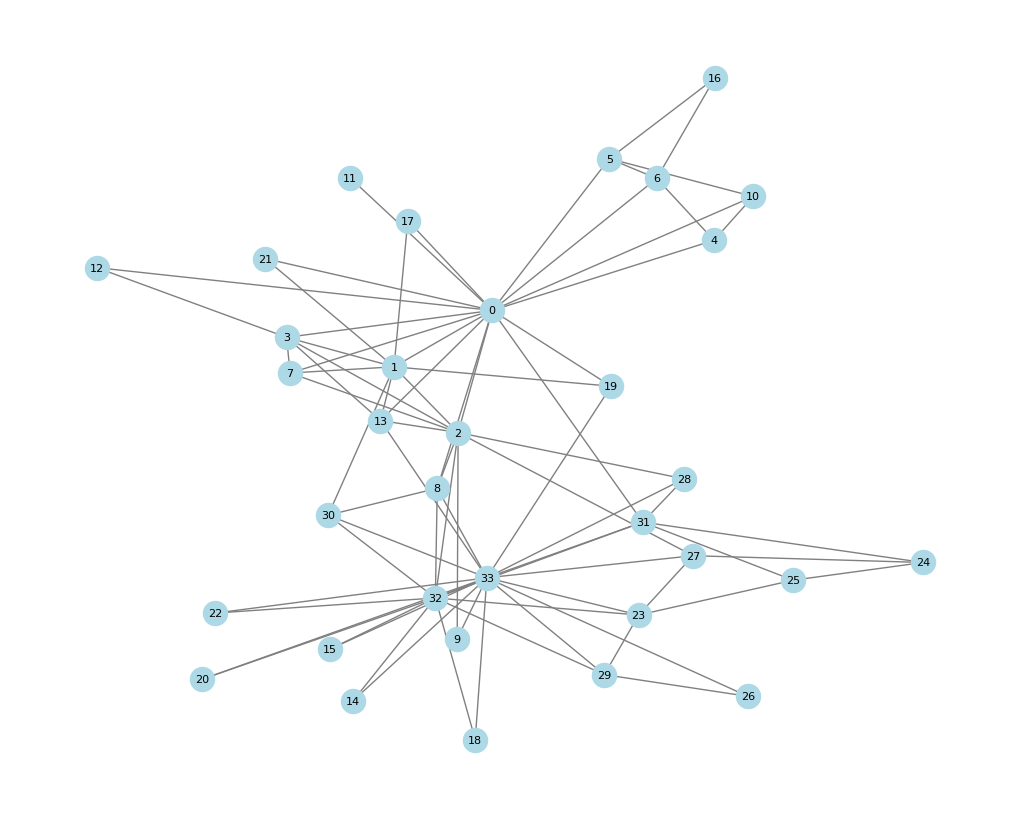


Iteration : 1



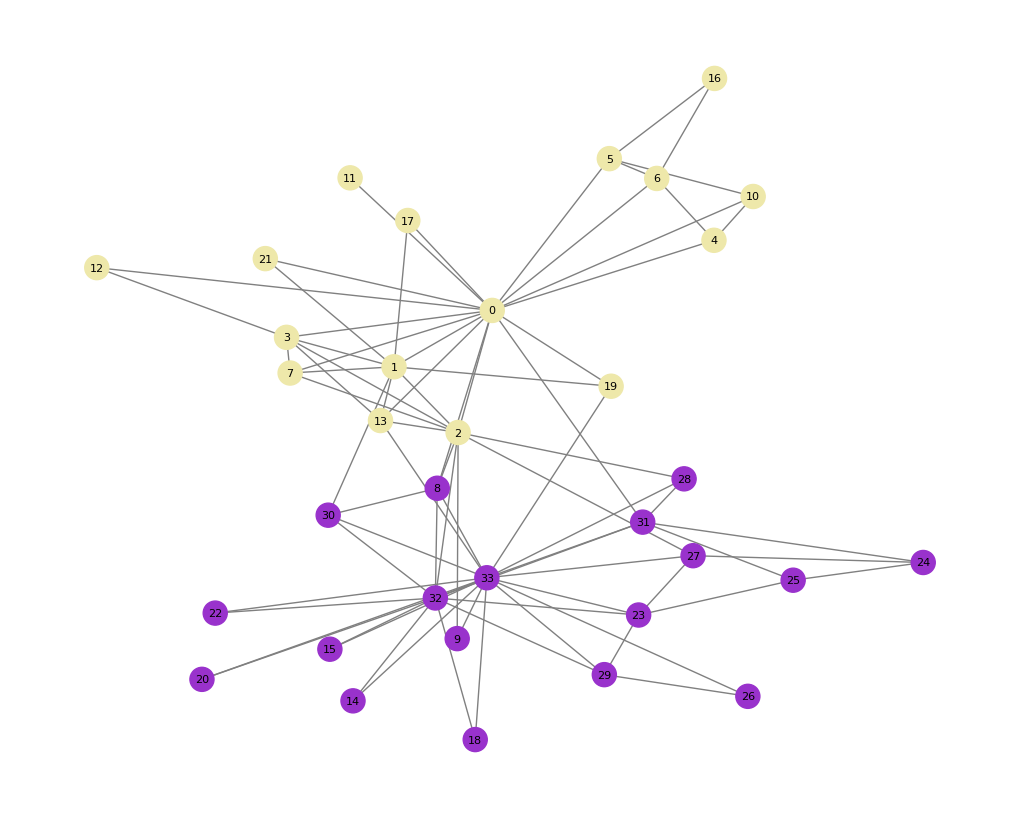


Iteration : 2



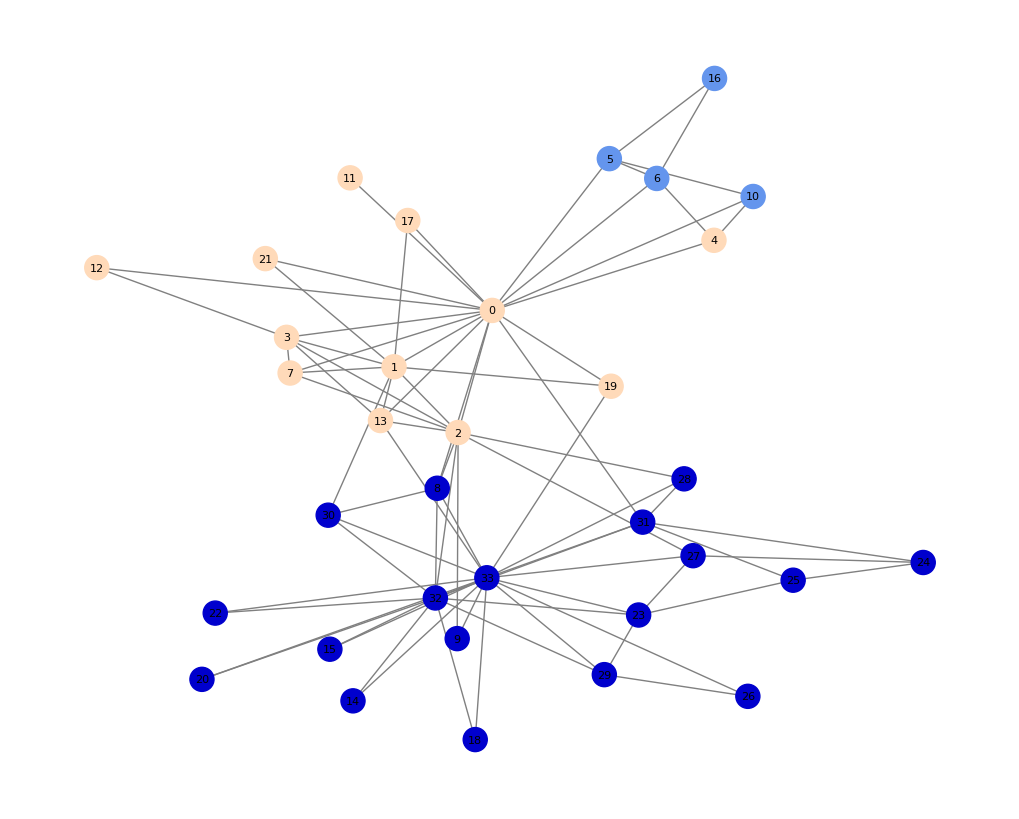

Select method of interest : 

1. Central Degree of Cardinality
2. Betweenness Centrality
3. Closeness Centrality
4. Coefficient of Clustering
5. Exit

Enter your choice : 5


Exiting Program...


In [ ]:
#Graph Declaration

a=menu_drive_graph()

if a==1:
  Graph=karate_club_graph()
elif a==2:
  Graph=Custom_Graph()
else:
  print()
  Graph=nx.Graph()
  print("Exiting Program...")

if a!=3:
  used_color=['lightblue']*len(Graph.nodes)                                       # Colors used
  ascii_colors = list(mcolors.CSS4_COLORS.keys())                                 # Color Palette
  remaining_colors = [color for color in ascii_colors if color not in used_color]

  initialization(Graph)

  master(Graph,j=0,k=1)

  menu_drive_method()